<a href="https://colab.research.google.com/github/TorbjornLarsson/SMI/blob/main/preparatory_notebooks/F7_deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook: F7 -- Deep Neural Networks

*Authors*: Hugo Toll, Ziwei Luo<br>
*Date*: Nov 2023

This notebook is complementary to lecture F7 about Deep Neural Networks in order to highlight some key concepts. The focus will be on
1. Understanding the deep nerual network and different activation functions such as **ReLU**, **Sigmoid**, and **Tanh**.
2. Exploring basic network structures in [NN playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.24826&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&showTestData_hide=false).

3. How a simple Neural Network can be implemented with PyTorch [*optional*].

Please read the instructions and play around with the notebook where it is described.

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

---
## 1. Composition of a Neural Network
A cornerstone of the neural network model is linear regression. We can write the linear regression model in the following form:

$$f(\mathbf{x}; \mathbf{\theta}) = \mathbf{W} \mathbf{x} + \mathbf{b} ,$$

where $\mathbf{x} = [x_1,..., x_d]^\intercal$ and $\mathbf{\theta} = [\mathbf{W}, \,\mathbf{b}]^\intercal$.

The neural network for regression is built on this model, but with a twist! More specifically, a neural network contains multiple linear regressions with nonlinear activation functions $h(\cdot)$, which can be written as
$$f(\mathbf{x}; \mathbf{\theta}) = \mathbf{W}^{(2)\intercal} \mathbf{q(\mathbf{x})} + \mathbf{b}^{(2)}$$

$$ \mathbf{q}(\mathbf{x}) = h(\mathbf{W}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})
$$

where $\mathbf{q}(\mathbf{x})$ is an intermediate variable. Note that the matrices ($\mathbf{W}^{(1)}$, $\mathbf{W}^{(2)}$) and vectors ($\mathbf{b}^{(1)}$, $\mathbf{b}^{(2)}$) are trainable parameters of this model.


### 1.1 Activation functions
The activation function is a non-linear function that is applied elementwise. One commonly used activation function in neural networks is the **Re**ctified **L**inear **U**nit (ReLU), which is defined as follows:
$$\mathrm{ReLU}(x) = \mathrm{max}(x, 0).$$

The activation function is used to insert non-linearity into the network. Without a non-linear activation function, the model can be reduced to a simple linear regression, which renders the additional step of transforming the input variables with $\mathbf{q}(\mathbf{x})$ obsolete.

In addition, we can also use the **Sigmoid** and **Tanh** as activation functions that are defined by
$$ \mathrm{Sigmoid}(x) = \frac{1}{1+e^{-x}}, \quad \mathrm{Tanh}(x) = \frac{e^{x} - e^{-x}}{e^{x}+e^{-x}}. $$


Below is an example of fitting non-linear data with a two-layer neural network.

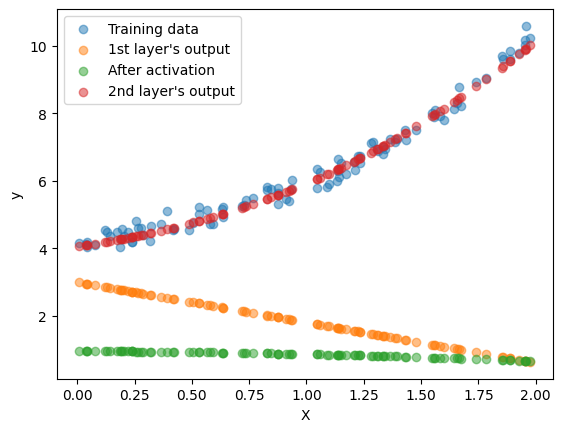

In [19]:
np.random.seed(0)
X = 2*np.random.rand(100, 1)  # Feature (independent variable)
y = np.e ** X + np.pi + np.random.normal(0, 0.2, (100,1)) # Target (dependent variable)

def linear(x, w, b):
    out = np.dot(w, x) + b
    return out

def relu(x):
    out = x.copy()
    out[out<0] = 0
    return out

def sigmoid(x):
    out = 1 / (1 + np.exp(-x))
    return out

def tanh(x):
    out = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return out

def plot_neural_network(data_X, data_y, actvation_fn, param_W1, param_b1, param_W2, param_b2):
  q = linear(data_X, param_W1, param_b1)
  q_activate = actvation_fn(q)
  out = linear(q_activate, param_W2, param_b2)

  plt.scatter(data_X, data_y, alpha=0.5, label="Training data")
  plt.scatter(data_X, q, alpha=0.5, label=r"1st layer's output")
  plt.scatter(data_X, q_activate, alpha=0.5, label='After activation')
  plt.scatter(data_X, out, alpha=0.5, label="2nd layer's output")
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend()
  plt.show()

# Default parameters for demonstration
W1, b1 = -1.2, 3
W2, b2 = -19.9, 23
act_fn = sigmoid

# Call the plotting function
plot_neural_network(X, y, act_fn, W1, b1, W2, b2)

**Task:**

- Can you change the parameter to other values and fit the same dataset again?

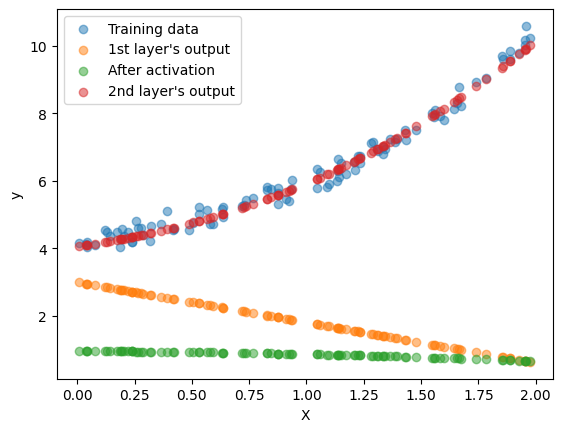

In [20]:
W1, b1 = -1.2, 3
W2, b2 = -19.9, 23
act_fn = sigmoid

plot_neural_network(X, y, act_fn, W1, b1, W2, b2) # don't need to be perfectly matched

### 1.2 Neural Network with multiple hidden layers
To get a more complex neural network multiple transformations $\mathbf{q}$ of the input data can be added in series, so that the result of one transformation is the input to the next transformation. This gives the following network structure:

$$\begin{align}
\mathbf{q}^{(0)} &= \mathbf{x}\\
\mathbf{q}^{(l)} &= h(\mathbf{W}^{(l)}\mathbf{q}^{(l-1)} + \mathbf{b}^{(l)}),\,\,\,\,\,\,\,\,\,\, l = 1,2,...,L-1 \\
f(\mathbf{x}; \mathbf{\theta}) &= \mathbf{W}^{(L)\intercal} \mathbf{q}^{(L-1)} + \mathbf{b}^{(L)}\end{align}$$

Each element in the vectors $\mathbf{q}^{(l)}$ is called a node, neuron or hidden unit. And the network is said to have $L-1$ **hidden layers**, since the user of the model often only sees the input data and the result from the output layer.

### 1.3 Neural Network for classification
#### Binary classification with logistic function
Neural networks can be used for binary classification. This is achieved in the same way the linear regression model is extended for classification, we use the logistic function *in the last layer*! Notably, the logistic function is defined as the same as the *Sigmoid* function:
$$f(x) = \frac{1}{1+e^{-x}}.$$

This function transforms all values of $x$ into a range between 0 and 1, which means that we can interpret the output value as a probability. So to use a neural network for binary classification we can simply transform the output of the last layer with a logistic function.

#### Multiclass classification and softmax

For multiclass classification with $M$ output labels the output layer needs to have $M$ nodes. A special activation function called **softmax** is used *in the last layer* to transform the values of these nodes to probabilities. The softmax function is defined as

$$\mathrm{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^M e^{z_j}} \;\;\; \mathrm{for} \,\, i=1,\ldots,M $$

where $z_i$ denotes the nodes of the output layer. Since the outputs from this activation function always sum up to 1, we can interpret them as probabilities of the input belonging to the different classes.

Commonly, the label with maximum probability $p_i$ is chosen as the prediction $y$:

$$ y = \mathop{\arg\max}\limits_{i} (p_1,\ldots,p_M). $$

In [21]:
# Numpy example code for the Softmax function (1D vector)
def softmax(x):
    sum_exps = np.sum(np.exp(x))
    out = np.exp(x) / sum_exps
    # or: out = np.exp(x - np.log(sum_exps))
    return out

---
##  2. Exploring basic Neural Network structures
Using the [NN playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.24826&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&showTestData_hide=false) is a good way to get familiar with how a neural network works. With it you are able to design a simple neural network and train it directly in your browser.

The training of a neural network is performed with a method called stochastic gradient descent, which you will learn more about in the next lecture. The weights and biases in the network are initialized with random weights and then will be updated iteratively in order to minimize a certain loss function. The training only finds a local minimum of the loss function so different parameter initializations can give different results.

In the following tasks you will design and train a neural network for a simple classification problem.

**Tasks:**
1. Open the link above (settings will be pre-selected).

2. Remove both the hidden layers and click the play button to train your network.

3. Select $X_1^2$ and $X_2^2$ as the current input features to train your model. As you can see this gives a very good fit to the provided data (for most of the parameter initializations). Why is that?

4. Go back to using $X_1$ and $X_2$ as input features and add a hidden layer with 6 neurons. Train your model.

5. Try different numbers of neurons in the hidden layer. What is the minimum number of neurons that the model needs to obtain a good fit to this data?



4

---
## 3. Deep Neural Network Implementation [*optional*]

This is an **optional** section to show a simple implementation of deep neural networks with modern automatic differentiation libraries such as [PyTorch](https://pytorch.org/). Based on the these libraries, we only need a few steps to design the full model:

1. Prepare datasets
2. Define the network
3. Train the network
4. Prediction

In Appendix, we provide an example code for DNN-based binary classification. You can run the code and take a look at the plot of the dataset.

---

# Take-home message

* Activation functions are used to insert non-linearity into a neural network.
  * **ReLU**, **Sigmoid** and **Tanh** are commonly used as activation functions for the hidden layers.
  * The **logistic function** is used on the output layer in a binary classifier.
  * The **softmax** function is used on the output layer for multiclass classification.
* Different parameter initializations can give different results from the training of a neural network.
* The model complexity of a neural network is increased with the number of neurons and the number of hidden layers.
* It is relatively simple to implement a neural network with libraries such as PyTorch.

**Recommendation for further reading:** The material covered in this notebook is well-covered in Chapter 6.1 and Chapter 6.2 of the course book *Machine Learning - A First Course for Engineers and Scientists*.

---

# Appendix<br> <sub>Implementing a simple Neural Network in PyTorch</sub>
This section is included to give you a sense of what is needed to implement your own neural network [*optional*].

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

### 1. Prepare datasets

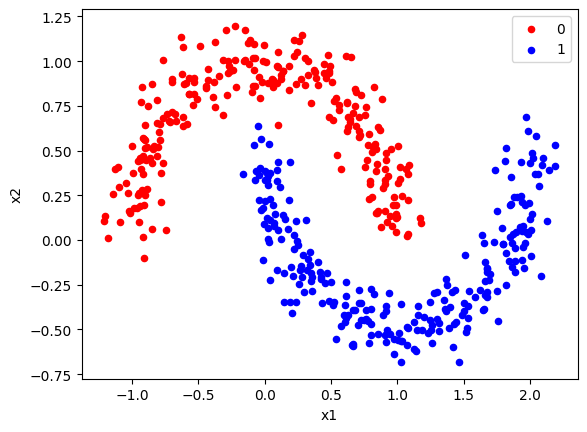

In [26]:
import pandas as pd
from sklearn.datasets import make_moons

# generate 2d classification dataset
X, y = make_moons(n_samples=500, noise=0.1, random_state=111)

# generate the validation dataset
X_valid, y_valid = make_moons(n_samples=500, noise=0.1, random_state=444)

# convert all numpy data to PyTorch tensors
X_train_tensor = torch.tensor(X).float()
y_train_tensor = torch.tensor(y).float()
X_valid_tensor = torch.tensor(X_valid).float()
y_valid_tensor = torch.tensor(y_valid).float()

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
plt.show()

### 2. Define the network.
In this case we use one hidden layer with 16 neurons.

In [27]:
class BinaryClassifier(nn.Module):
    def __init__(self, channel_in=2, hidden_dim=16):
        super().__init__()
        self.fc1 = nn.Linear(channel_in, hidden_dim) # hidden layer with 16 nodes
        self.act = nn.ReLU() # activation function
        self.fc2 = nn.Linear(hidden_dim, 1) # output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return torch.sigmoid(x)

# define the network specified above
model = BinaryClassifier()

### 3. Train the network
In the code cell below, the training of the neural network is performed. Run the cell and inspect the training loss curve.

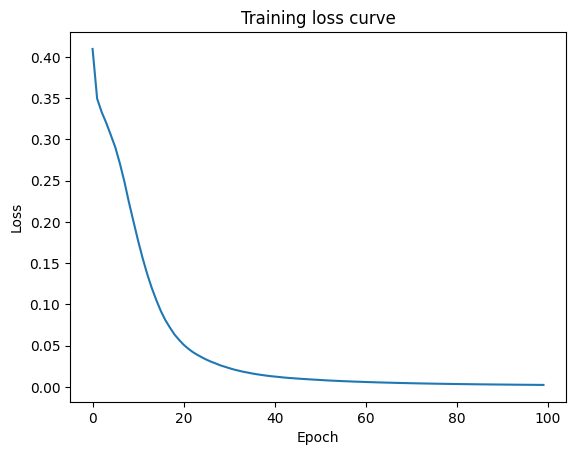

In [28]:
def train(dataloader, model, optimizer, num_epochs=10):
    losses = []
    for epoch in range(num_epochs):
        for inputs, labels in dataloader:
            preds = model(inputs).squeeze()
            # compute loss
            loss = F.binary_cross_entropy(preds, labels)
            # optimize parameters
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        losses.append(loss.item()) # we use .item() to convert a tensor to numpy
        #print(f'Epoch {epoch}/{num_epochs}\tloss: {loss.item():.4f}')
    return losses

def predict_accuracy(model, inputs, labels):
    probs = model(inputs).squeeze()
    preds = (probs > 0.5).float()
    accuracy = (preds == labels).float().mean()
    return accuracy.item()

def plot_loss(losses):
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training loss curve')

# hyperparameters for the training
batch_size = 32
learning_rate = 1
num_epochs = 100

# prepare the datasets
dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# train the network using stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
losses = train(dataloader, model, optimizer, num_epochs)
plot_loss(losses)

### 4. Prediction
To finish up let's take a look at the decision boundary of our trained model. Run the code below and inspect the result.

Training accuracy: 1.0000, validation accuracy: 0.9940


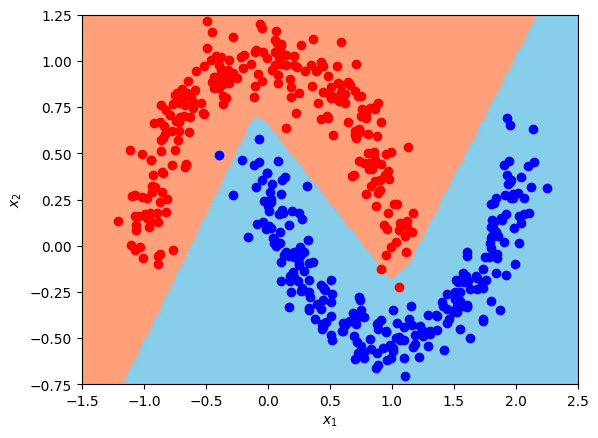

In [29]:
# prediction
train_accuracy = predict_accuracy(model, X_train_tensor, y_train_tensor)
valid_accuracy = predict_accuracy(model, X_valid_tensor, y_valid_tensor)
print(f'Training accuracy: {train_accuracy:.4f}, validation accuracy: {valid_accuracy:.4f}')

#This code cell plots the decision boundary together with validation data

fig, ax = plt.subplots()
ax.set_xlim((-1.5, 2.5))
ax.set_ylim((-0.75, 1.25))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

#classify a grid of points to visualize the decision boundary
res = 0.01
xs1 = np.arange(-1.5, 2.5, res)
xs2 = np.arange(-0.75, 1.25, res)
x1, x2 = np.meshgrid(xs1, xs2)
X_all = np.column_stack([x1.flatten(),x2.flatten()])
result = model(torch.tensor(X_all).float())
result = (result > 0.5).float()
colors = np.where(result==0,'lightsalmon', 'skyblue').flatten()
ax.scatter(x1.flatten(), x2.flatten(), s = 10, marker='s', c=colors)

# plot validation data
ax.plot(X_valid[:,0][y_valid==1], X_valid[:,1][y_valid==1], 'o', color='b')
ax.plot(X_valid[:,0][y_valid==0], X_valid[:,1][y_valid==0], 'o', color='r')
plt.show()